=== EJERCICIO 2: COMPARACIÓN DE MODELOS BOOSTING ===

PASO 1: Cargando dataset...
Dataset cargado: 1599 filas x 12 columnas

Primeras filas:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11

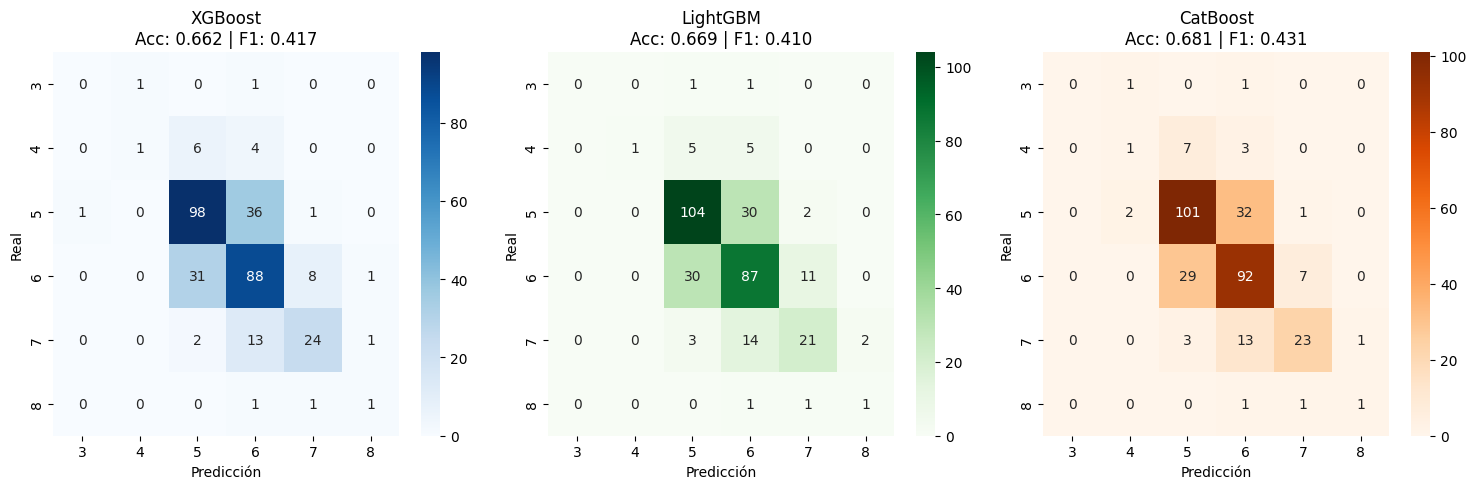

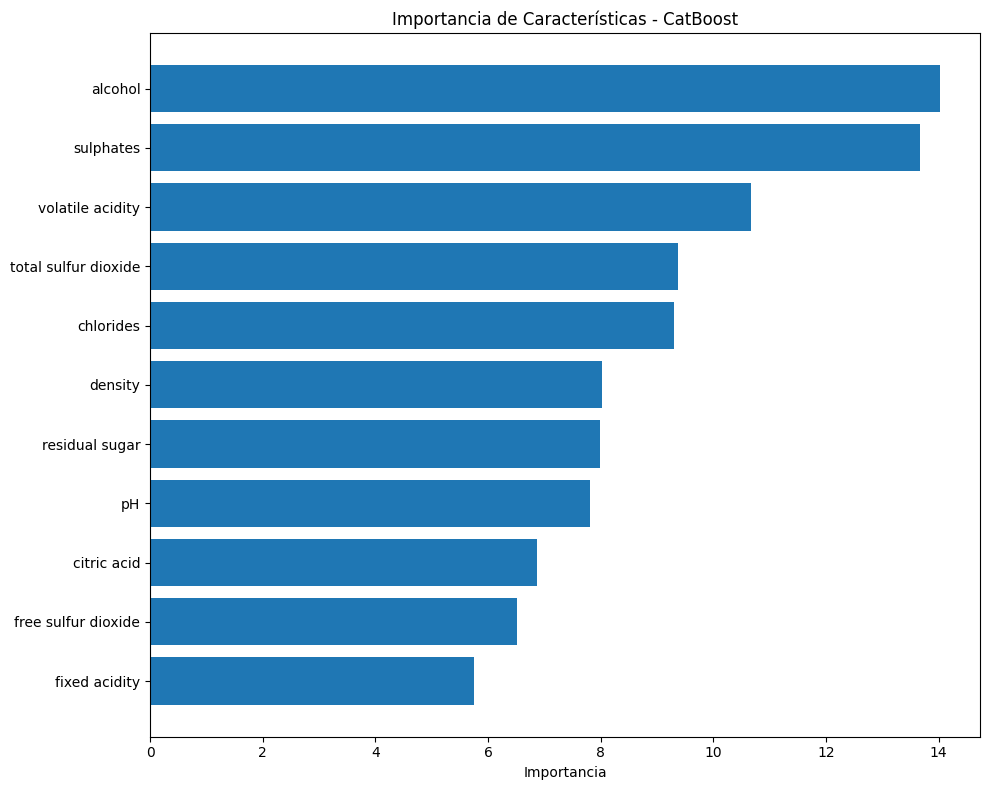

In [1]:
# ==============================================
# EJERCICIO 2: Comparación de Modelos de Boosting (Nivel Intermedio)
# Objetivo: Comparar XGBoost, LightGBM y CatBoost en clasificación multiclase
# Dataset: Wine Quality Dataset
# ==============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

print("=== EJERCICIO 2: COMPARACIÓN DE MODELOS BOOSTING ===\n")

# PASO 1: Carga del dataset
print("PASO 1: Cargando dataset...")
df = pd.read_csv('../../Dataset/winequality-red.csv')
print(f"Dataset cargado: {df.shape[0]} filas x {df.shape[1]} columnas")

print(f"\nPrimeras filas:")
print(df.head())

print(f"\nDistribución de calidad:")
print(df['quality'].value_counts().sort_index())

print(f"\nRango de calidad: {df['quality'].min()} - {df['quality'].max()}")

# PASO 2: Preprocesamiento
print(f"\nPASO 2: Preprocesamiento...")

# Verificar valores faltantes
print(f"Valores faltantes: {df.isnull().sum().sum()}")

# Mapear clases para que empiecen desde 0 (XGBoost lo requiere)
print(f"Clases originales: {sorted(df['quality'].unique())}")

# Crear mapeo: 3→0, 4→1, 5→2, 6→3, 7→4, 8→5
quality_mapping = {3:0, 4:1, 5:2, 6:3, 7:4, 8:5}
reverse_mapping = {0:3, 1:4, 2:5, 3:6, 4:7, 5:8}

# Preparar características y target
X = df.drop('quality', axis=1)
y = df['quality'].map(quality_mapping)

print(f"Clases mapeadas: {sorted(y.unique())}")
print(f"Características: {list(X.columns)}")
print(f"Mapeo: 3→0, 4→1, 5→2, 6→3, 7→4, 8→5")

# PASO 3: Dividir datos (80/20)
print(f"\nPASO 3: Dividiendo datos...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Entrenamiento: {X_train.shape[0]} | Prueba: {X_test.shape[0]}")

# PASO 4: Entrenar modelos
print(f"\nPASO 4: Entrenando modelos...")

# XGBoost
print("Entrenando XGBoost...")
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=6,  # Tenemos 6 clases (0-5)
    random_state=42,
    eval_metric='mlogloss'
)
xgb_model.fit(X_train, y_train)

# LightGBM
print("Entrenando LightGBM...")
lgb_model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=6,  # Tenemos 6 clases (0-5)
    random_state=42,
    verbose=-1
)
lgb_model.fit(X_train, y_train)

# CatBoost
print("Entrenando CatBoost...")
cat_model = cb.CatBoostClassifier(
    loss_function='MultiClass',
    random_state=42,
    verbose=False
)
cat_model.fit(X_train, y_train)

print("Todos los modelos entrenados")

# PASO 5: Predicciones y evaluación
print(f"\nPASO 5: Evaluando modelos...")

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgb = lgb_model.predict(X_test)
y_pred_cat = cat_model.predict(X_test)

# Métricas
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
accuracy_cat = accuracy_score(y_test, y_pred_cat)

f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
f1_lgb = f1_score(y_test, y_pred_lgb, average='macro')
f1_cat = f1_score(y_test, y_pred_cat, average='macro')

print(f"RESULTADOS:")
print(f"XGBoost  - Accuracy: {accuracy_xgb:.3f} | Macro F1: {f1_xgb:.3f}")
print(f"LightGBM - Accuracy: {accuracy_lgb:.3f} | Macro F1: {f1_lgb:.3f}")
print(f"CatBoost - Accuracy: {accuracy_cat:.3f} | Macro F1: {f1_cat:.3f}")

# PASO 6: Matrices de confusión
print(f"\nPASO 6: Generando matrices de confusión...")

# Etiquetas originales para visualización
labels_originales = [3, 4, 5, 6, 7, 8]

plt.figure(figsize=(15, 5))

# XGBoost
plt.subplot(1, 3, 1)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels_originales, yticklabels=labels_originales)
plt.title(f'XGBoost\nAcc: {accuracy_xgb:.3f} | F1: {f1_xgb:.3f}')
plt.xlabel('Predicción')
plt.ylabel('Real')

# LightGBM
plt.subplot(1, 3, 2)
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels_originales, yticklabels=labels_originales)
plt.title(f'LightGBM\nAcc: {accuracy_lgb:.3f} | F1: {f1_lgb:.3f}')
plt.xlabel('Predicción')
plt.ylabel('Real')

# CatBoost
plt.subplot(1, 3, 3)
cm_cat = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Oranges',
            xticklabels=labels_originales, yticklabels=labels_originales)
plt.title(f'CatBoost\nAcc: {accuracy_cat:.3f} | F1: {f1_cat:.3f}')
plt.xlabel('Predicción')
plt.ylabel('Real')

plt.tight_layout()
plt.savefig('comparacion_boosting.png', dpi=300, bbox_inches='tight')
print("Matrices guardadas: comparacion_boosting.png")

# PASO 7: Importancia de características
print(f"\nPASO 7: Importancia de características...")

# Obtener importancias (usando el mejor modelo)
modelos = {
    'XGBoost': (xgb_model, accuracy_xgb),
    'LightGBM': (lgb_model, accuracy_lgb),
    'CatBoost': (cat_model, accuracy_cat)
}

mejor_modelo_nombre = max(modelos, key=lambda x: modelos[x][1])
mejor_modelo = modelos[mejor_modelo_nombre][0]

print(f"Mejor modelo: {mejor_modelo_nombre}")

# Extraer importancias
if mejor_modelo_nombre == 'XGBoost':
    importances = mejor_modelo.feature_importances_
elif mejor_modelo_nombre == 'LightGBM':
    importances = mejor_modelo.feature_importances_
else:  # CatBoost
    importances = mejor_modelo.feature_importances_

# Crear DataFrame para visualización
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values('importance', ascending=True)

# Visualizar
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title(f'Importancia de Características - {mejor_modelo_nombre}')
plt.xlabel('Importancia')
plt.tight_layout()
plt.savefig('importancia_caracteristicas.png', dpi=300, bbox_inches='tight')
print("Importancia guardada: importancia_caracteristicas.png")

# Resumen final
print(f"\n=== RESUMEN ===")
print(f"XGBoost:  Acc={accuracy_xgb:.3f} | F1={f1_xgb:.3f}")
print(f"LightGBM: Acc={accuracy_lgb:.3f} | F1={f1_lgb:.3f}")
print(f"CatBoost: Acc={accuracy_cat:.3f} | F1={f1_cat:.3f}")
print(f"\nMejor modelo: {mejor_modelo_nombre}")
print(f"Top 3 características importantes:")
for i, row in feature_importance.tail(3).iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f}")

print(f"\nEJERCICIO COMPLETADO!")